# TP Python - Scientific Data Science

De las señales del EPOC Emotiv que obtuvimos de SUJETO, intenten estudiar las señales detectando: los pestañeos sobre F8 y F7, el momento donde el sujeto cierra los ojos, donde abre y cierra la boca, donde mueve la cabeza haciendo Roll, y donde mueve la cabeza haciendo YAW



In [53]:
# coding: latin-1
# Requisitos : se debe instalar la libreria 'mne' en el entorno 'mne3' 
import pandas as pd
import numpy as np
import mne
import os
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats


## Datos 


In [3]:


signals = pd.read_csv('data/experimentosujeto.dat', delimiter=' ', names = [
            "COUNTER",
        "AF3",
        "F7",
        "F3",
        "FC5",
        "T7",
        "P7",
        "O1",
        "O2",
        "P8",
        "T8",
        "FC6",
        "F4",
        "F8",
        "AF4",
        "GYRO_X",
        "GYRO_Y",
        "RESERVED1",
        "RESERVED2",
        "RESERVED3",
        "RESERVED4",
        "RESERVED5"])


# Análisis Exploratorio

In [20]:
print('VISUALIZACIONES')
print('=============================================================================================================')
print('Primeros registros')
print(signals.head())
print('=============================================================================================================')
print('Filas y Columnas del Dataset: ')
print(signals.shape)
print('=============================================================================================================')
print('Último registro del DATASET: ',signals[-1:])
print('=============================================================================================================')
signals.info()

VISUALIZACIONES
Primeros registros
   COUNTER  AF3   F7   F3  FC5    T7   P7   O1   O2   P8  ...  F4   F8  AF4  \
0       43  352  359 -132  -17  1024 -547  572  528  228  ...  80  496  335   
1       44  349  328 -125  -18  1024 -548  575  527  228  ...  90  503  340   
2       45  354  356 -125  -14  1025 -544  583  527  228  ...  91  488  342   
3       46  360  404 -125  -13  1023 -547  581  528  228  ...  86  482  341   
4       47  356  365 -119  -15  1025 -546  581  530  228  ...  88  474  338   

   GYRO_X  GYRO_Y  RESERVED1  RESERVED2  RESERVED3  RESERVED4  RESERVED5  
0      -6       3          0          0          0          0          0  
1      -6       3          0          0          0          0          0  
2      -6       3          0          0          0          0          0  
3      -5       3          0          0          0          0          0  
4      -5       3          0          0          0          0          0  

[5 rows x 22 columns]
Filas y Columnas 

<font color='green'>Se observa que no existen valores nulos o NAN y que todos las variables son números enteros, la cantidad total de registros es de 19274 y 22 columnas/variables</font>


<font color='green'>En general se espera que el sensor registre todos los eventos
Para verificar esto se analiza la variable COUNTER (q podria tomarse como el id de los eventos registrados, sus valores posibles se encuentran en el rango de 0 a 128) 
Se chequea si faltan valores en los rangos de 0..128 para los 19274 registros
Se utiliza funcion DIFF de PANDAS que devuelve la cantidad de</font>  

In [24]:
print('Valor Máximo Variable COUNTER:',signals['COUNTER'].max())
print('=============================================================================================================')
print('Valor Mínimo Variable COUNTER:',signals['COUNTER'].min())
print('=============================================================================================================')


Valor Máximo Variable COUNTER: 128
Valor Mínimo Variable COUNTER: 0


<font color='green'>Como se puede observar en la siguiente celda. Al dividir la cantidad total de registros por 129 (0..128). Cada valor del rango 0..128 de la variable COUNTER puede que se repita 129 o 150 veces al no ser una division exacta, pero esto no implicaría que existan valores faltantes por lo menos para esta observación
</font>

In [32]:
pd.set_option('display.max_rows', 132)
print('Variable COUNTER Ocurrencias de repeticiones de valores numéricos en los 19274 registros:')
signals.COUNTER.value_counts()

Variable COUNTER Ocurrencias de repeticiones de valores numéricos en los 19274 registros:


50     150
67     150
75     150
59     150
43     150
85     150
90     150
74     150
58     150
66     150
82     150
89     150
73     150
57     150
51     150
83     150
81     150
88     150
72     150
56     150
87     150
71     150
55     150
52     150
68     150
84     150
86     150
70     150
54     150
53     150
91     150
69     150
47     150
79     150
93     150
77     150
61     150
64     150
94     150
80     150
45     150
63     150
46     150
49     150
92     150
62     150
78     150
95     150
76     150
60     150
44     150
65     150
48     150
32     149
97     149
16     149
100    149
116    149
20     149
5      149
21     149
37     149
36     149
96     149
4      149
115    149
2      149
18     149
34     149
33     149
17     149
1      149
98     149
114    149
3      149
19     149
35     149
128    149
112    149
113    149
99     149
127    149
119    149
101    149
124    149
106    149
122    149
11     149
27     149
107    149
123    149

# Análisis Señales

In [78]:
signals_split = pd.DataFrame(signals, columns=['F7','F8','O1','O2','GYRO_X','GYRO_Y'])
signals_F7F8 =  pd.DataFrame(signals, columns=['F7','F8'])
signals_O1O2 =  pd.DataFrame(signals, columns=['O1','O2'])


In [37]:
print(signals_split)

        F7   F8   O1   O2  GYRO_X  GYRO_Y
0      359  496  572  528      -6       3
1      328  503  575  527      -6       3
2      356  488  583  527      -6       3
3      404  482  581  528      -5       3
4      365  474  581  530      -5       3
...    ...  ...  ...  ...     ...     ...
19269  384  731  589  543      -7       3
19270  422  749  591  547      -7       3
19271  437  750  595  546      -7       3
19272  443  763  592  544      -6       3
19273  448  771  589  549      -7       3

[19274 rows x 6 columns]


In [38]:
print(signals_F7F8)

        F7   F8
0      359  496
1      328  503
2      356  488
3      404  482
4      365  474
...    ...  ...
19269  384  731
19270  422  749
19271  437  750
19272  443  763
19273  448  771

[19274 rows x 2 columns]


# Análisis MNE 

# O1 y O2  

<font color='green'>Con la libreria "mne" https://mne.tools/dev/index.html 
Se utilizan los metodos create_info y RawArray para plotear y filtrar las mediciones de O1 Y O2
Clásicamente, se describen con letras griegas los ritmos cerebrales: alfa, beta, theta y delta. 
Las frecuencias respectivas se expresan en ciclos por segundo o Hertz (Hz). La actividad
alfa es de 8-12 Hz, Beta mayor de 12 Hz, Theta de 4-7.5 Hz y delta de menos de 4 Hz.    
Asociar los vectores de las señales con estados y respuestas (parpadeo, etc)</FONT>


Creating RawArray with float64 data, n_channels=2, n_times=19274
    Range : 0 ... 19273 =      0.000 ...   150.570 secs
Ready.
Effective window size : 16.000 (s)


<ipython-input-136-e8dec06f931a>:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


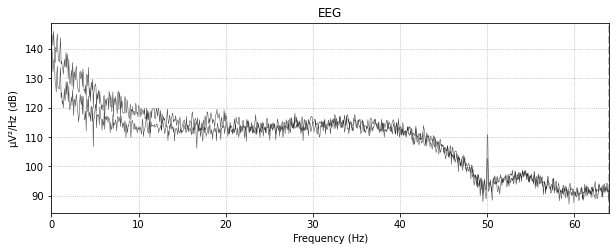

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 423 samples (3.305 sec)

Effective window size : 16.000 (s)


<ipython-input-136-e8dec06f931a>:12: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


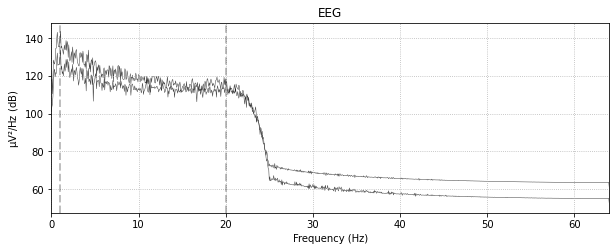

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 423 samples (3.305 sec)

Effective window size : 16.000 (s)


<ipython-input-136-e8dec06f931a>:14: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


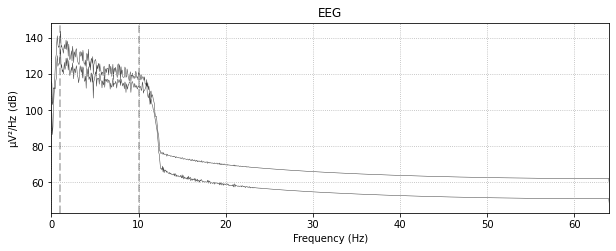

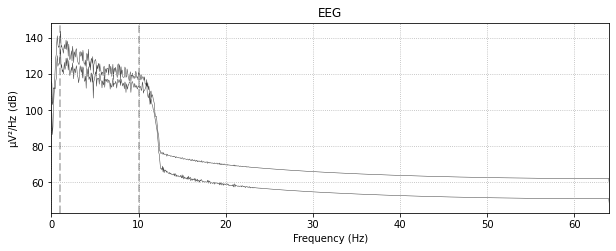

In [136]:

sfreq = 128
data =data[:,list([0,1])]
#ch_renames = ['F7','F8']
ch_renames = ['O1','O2']
ch_types = ['eeg' for _ in ch_renames]

info = mne.create_info(ch_renames, sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)
#raw.add_events(events)
raw.plot_psd()
raw.filter(1,20)
raw.plot_psd()
raw.filter(1,10)
raw.plot_psd()


# F7 y F8  

Creating RawArray with float64 data, n_channels=2, n_times=19274
    Range : 0 ... 19273 =      0.000 ...   150.570 secs
Ready.
Effective window size : 16.000 (s)


<ipython-input-138-2aeea3d5ca4a>:9: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


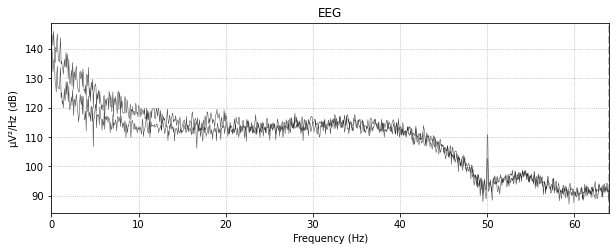

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 423 samples (3.305 sec)

Effective window size : 16.000 (s)


<ipython-input-138-2aeea3d5ca4a>:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


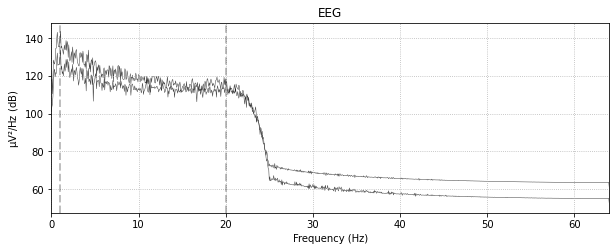

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 423 samples (3.305 sec)

Effective window size : 16.000 (s)


<ipython-input-138-2aeea3d5ca4a>:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


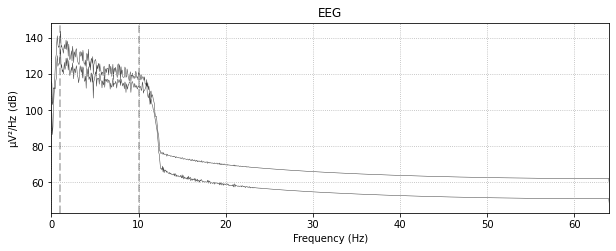

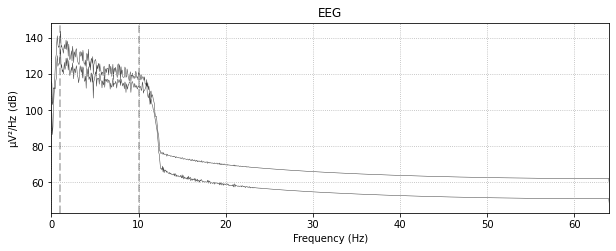

In [138]:

sfreq = 128
data =data[:,list([0,1])]
ch_renames = ['F7','F8']
ch_types = ['eeg' for _ in ch_renames]

info = mne.create_info(ch_renames, sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)
#raw.add_events(events)
raw.plot_psd()
raw.filter(1,20)
raw.plot_psd()
raw.filter(1,10)
raw.plot_psd()


## Conclusiones MNE  - PSD 
<font color='green'> EL cálculo de PSD, Power Spectral Density es una función matemática que nos muestra como está distribuida la potencia o la energía sobre las distintas frecuencias. En otras palabras, muestra en qué frecuencias las variaciones son fuertes y en qué frecuencias las variaciones son débiles, en los puntos mas fuertes para los valores de mucha amplitud podria inferirse como una feature para detectar el pestañeo, se aplican filtros en las frecuencias mas bajas y con mayor amplitud</font>

# Análisis Señales Detectando Picos

<font color='green'> Se utilizo el parámetro "prominence" https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_prominences.htmlde " de find_peaks en reemplazo de "heigth" ¿Qué es la prominencia (topográfica) ? Es "la altura mínima necesaria para descender para llegar desde la cumbre a cualquier terreno más alto" Mayor valor de prominencia  es más "importante" el pico. </font>

cantidad de picos utilizando parámetro "height":  4374
cantidad de picos utilizando parámetro "prominence":  810


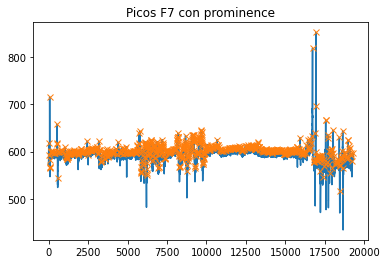

In [119]:
from scipy.signal import find_peaks, peak_prominences
eeg = data[:,0]
peaks1, _ = find_peaks(eeg, height=10)
peaks, _ = find_peaks(eeg, prominence=10)
plt.title(r'Picos F7 con prominence')
print('cantidad de picos utilizando parámetro "height": ',eeg[peaks1].size)
print('cantidad de picos utilizando parámetro "prominence": ',eeg[peaks].size)
plt.plot(eeg)
plt.plot(peaks, eeg[peaks], "x")
plt.show()

## Conclusiones 
<font color='green'> para F7  hay algunos picos fuertes, y otros "picos" más pequeños que puede ser causados simplemente por ruido, por ello se descartan utilizando find_peaks con el parámetro "prominence", el resultado es una cantidad de picos claramente indentificados que podrian ser señales ALFA que serian pestañeos mientras que en los picos mas fuertes se podrian indentificar el abrir y cerrar la boca por su amplitud</font>

cantidad de picos utilizando parámetro "height":  4562
cantidad de picos utilizando parámetro "prominence":  826


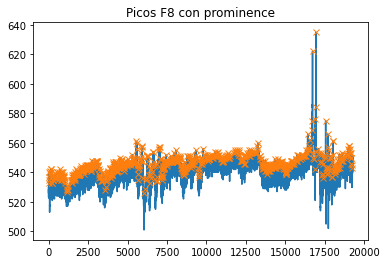

In [120]:
from scipy.signal import find_peaks
eeg = data[:,1]
peaks1, _ = find_peaks(eeg, height=10)
peaks, _ = find_peaks(eeg, prominence=10)
plt.title(r'Picos F8 con prominence')
print('cantidad de picos utilizando parámetro "height": ',eeg[peaks1].size)
print('cantidad de picos utilizando parámetro "prominence": ',eeg[peaks].size)
plt.plot(eeg)
plt.plot(peaks, eeg[peaks], "x") 
plt.show()


## Conclusiones 
<font color='green'> para F8  tambien se encuentran hay algunos picos fuertes, y otros "picos" más pequeños que pueden ser causados simplemente por ruido, por ello también se descartan utilizando find_peaks con el parámetro "prominence", el resultado es una cantidad de picos claramente indentificados que podrian ser señales ALFA que serian pestañeos mientras que en los picos mas fuertes se podrian indentificar el abrir y cerrar la boca por su amplitud</font>

# Análisis Señales PSD

In [144]:
from scipy.signal import butter, lfilter
import scipy.fftpack as fftpack
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y
def psd(y):
    # Number of samplepoints
    N = 128
    # sample spacing
    T = 1.0 / 128.0
    # Original Bandpass
    fs = 128.0
    fso2 = fs/2
    y = butter_bandpass_filter(y, 8.0, 15.0, fs, order=6)
    yf = np.fft.fft(y)
    return np.sum(np.abs(yf[0:int(N/2)]))


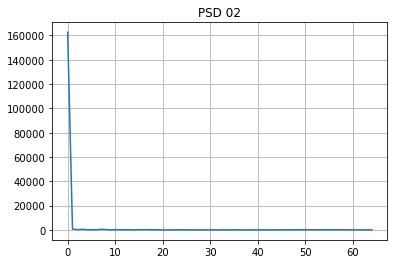

PSD:0.16129959515403963


In [145]:
#data1 = signals_O1O2.values
eeg = signals_O1O2.values
import scipy.fftpack as fftpack
N = 128
T = 1.0 / 128.0
#eeg = data1[:,1]
eeg_O2 = eeg[:,1]
shamsignal = False
if (shamsignal):
    x= np.linspace(0.0, 1.0, N)
#    eeg = eeg[:0] +  100*np.sin(10.0 * 2.0*np.pi*x)
    eeg_O2 = eeg_O2[:0] +  100*np.sin(10.0 * 2.0*np.pi*x)

yf = np.fft.fft(eeg_O2)
xf = np.linspace(0.0, int(1.0/(2.0*T)), int(N/2))

plt.close()
plt.title('PSD 02')
plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.grid()
plt.show()

print('PSD:' + str(psd(eeg[:1])))



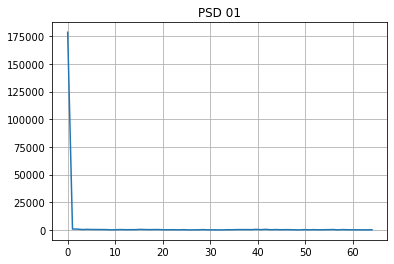

PSD:0.0


In [146]:
eeg = signals_O1O2.values
#import scipy.fftpack as fftpack
N = 128
T = 1.0 / 128.0
#eeg = data1[:,1]
eeg_O1 = eeg[:,0]
shamsignal = False
if (shamsignal):
    x= np.linspace(0.0, 1.0, N)
#    eeg = eeg[:0] +  100*np.sin(10.0 * 2.0*np.pi*x)
    eeg_O1 = eeg_O1[:0] +  100*np.sin(10.0 * 2.0*np.pi*x)

yf = np.fft.fft(eeg_O1)
xf = np.linspace(0.0, int(1.0/(2.0*T)), int(N/2))

plt.close()
plt.title('PSD 01')
plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.grid()
plt.show()

print('PSD:' + str(psd(eeg[:0])))



## Conclusiones PSD 
<font color='green'> EL cálculo de PSD, Power Spectral Density es una función matemática que nos muestra como está distribuida la potencia o la energía sobre las distintas frecuencias. En otras palabras, muestra en qué frecuencias las variaciones son fuertes y en qué frecuencias las variaciones son débiles, en los puntos mas fuertes para los valores de mucha amplitud podria inferirse como una feature para detectar el evento de abrir y cerrar los ojos </font>